In [1]:
#############
###paths#####
#############
import sys
import os

pwd = os.getcwd()
modellingpath = pwd.rpartition("modelling")[0] + pwd.rpartition("modelling")[1] 
sys.path.append(modellingpath + '/lib')
#############
import pickle as pkl
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from equations.class_subcircuit_eq import *
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit


In [2]:
def plotDoseResponse2(inducer,doseResponseRed, doseResponseGreen,semRed, semGreen, pad=0.01, inducerName = '[OC14]'):
    fig,ax = plt.subplots()

    ax.plot(inducer,doseResponseRed,label='RFP', c='red')
    ax.errorbar(inducer,doseResponseRed,yerr=semRed,c='red',fmt='o')
    ax.legend(loc='center left') #upper right
    # ax.ticklabel_format(useOffset=False)
    ax.set_xscale('log')
    ax.set_xlabel(inducerName)
    ax.set_ylim(0,np.amax(doseResponseRed)*1.1)
    ax.set_ylabel('RFP / ($A_{600}$ $RFP_{basal})$')
    ax2=ax.twinx()
    ax2.plot(inducer,doseResponseGreen,label='GFP', c='green')
    ax2.errorbar(inducer,doseResponseGreen,yerr=semGreen,c='green',fmt='o')
    ax2.legend(loc='center right') #upper left
    # ax2.ticklabel_format(useOffset=False)
    ax.set_xscale('log')
    ax2.set_xlabel(inducerName)
    ax2.set_ylim(0,np.amax(doseResponseGreen)*1.1)
    ax2.set_ylabel('GFP / ($A_{600}$ $GFP_{basal})$')

    plt.show()
    
def plotDoseResponsevsData(inducer,inducer_continuous, rfpExp_list, gfpExp_list, semRed, semGreen, doseResponseRed,doseResponseGreen,pad=0.01):
    fig,ax = plt.subplots()

    ax.plot(inducer_continuous,doseResponseRed,label='RFP', c='red')
    ax.scatter(inducer,rfpExp_list, c='red')
    ax.errorbar(inducer,rfpExp_list,yerr=semRed,c='red',fmt='o')
    ax.legend(loc='center left') #upper right
    ax.set_ylabel('RFP / ($A_{600}$ $RFP_{basal})$')
    ax.set_xscale('log')


    ax2=ax.twinx()
    ax2.plot(inducer_continuous,doseResponseGreen,label='GFP', c='green')
    ax2.scatter(inducer,gfpExp_list, c='green')
    ax2.errorbar(inducer,gfpExp_list,yerr=semGreen,c='green',fmt='o')
    ax2.legend(loc='center right') #upper left
    ax2.set_ylabel('GFP / ($A_{600}$ $GFP_{basal})$')
    ax.set_xscale('log')


    plt.show()

def plotDoseResponse(inducer_list, U_ss, color='k'):
    plt.plot(inducer_list,U_ss, c=color)
    plt.xlabel('[inducer]')
    plt.ylabel('Fluorescence')
    plt.xscale('log')
    plt.show()

def doseResponse(subcircuit, inducer_list, initial_conditions=[10,10]):
    U_ss = []
    T=1000
    t = np.linspace(0, T, T*50)
    for inducer in inducer_list:
        sol = odeint(subcircuit.ddt, initial_conditions, t, args=(inducer,inducer))
        Ustar_ODE=sol[-1]
        U_ss.append(sol[-1])
    return np.array(U_ss)


def gfp_steadystate(OC14,muv, Vf, kv, Kvb, nvb): 
    F = 1 + Vf*(1/(1+((muv*Kvb)/(kv*OC14 + 1e-8))**nvb))
    return F

def rfp_steadystate(F,Ve,Kfe,nfe): 
    E = 1 + Ve*(1/(1+(F/(Kfe+1e-8))**nfe))
    return E

def subcircuit11_doseResponse(OC14,muv, Vf, kv, Kvb, nvb,Ve,Kfe,nfe):
    F = 1 + Vf*(1/(1+((muv*Kvb)/(kv*OC14 + 1e-8))**nvb))
    E = 1 + Ve*(1/(1+(F/(Kfe+1e-8))**nfe))
    return E,F



## Subcircuit 1

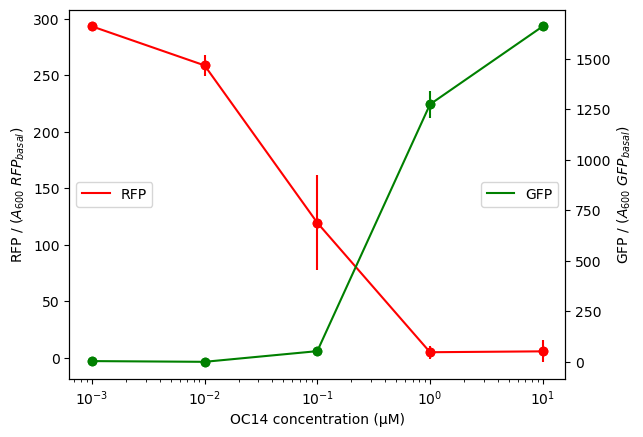

[293.3971953307317,
 258.8206593015367,
 119.60802272877595,
 5.0770541162620395,
 5.855838338672768]

In [3]:
def plotData(inducer, rfpExp_list, gfpExp_list, semRed, semGreen,pad=0.01, inducerName='OC14'):
    fig,ax = plt.subplots()

    ax.plot(inducer,rfpExp_list,label='RFP', c='red')
    ax.scatter(inducer,rfpExp_list, c='red')
    ax.errorbar(inducer,rfpExp_list,yerr=semRed,c='red',fmt='o')
    ax.legend(loc='center left') #upper right
    ax.set_ylabel('RFP / ($A_{600}$ $RFP_{basal})$')
    ax.set_xscale('log')


    ax2=ax.twinx()
    ax2.plot(inducer,gfpExp_list,label='GFP', c='green')
    ax2.scatter(inducer,gfpExp_list, c='green')
    ax2.errorbar(inducer,gfpExp_list,yerr=semGreen,c='green',fmt='o')
    ax2.legend(loc='center right') #upper left
    ax2.set_ylabel('GFP / ($A_{600}$ $GFP_{basal})$')
    ax.set_xscale('log')

    ax.set_xlabel(f'{inducerName} concentration (µM)')

    plt.show()
    
doseResponseExp = pkl.load(open('input/liquid_culture/curatedData/subcircuit1_circuit14_doseResponseOC14_maxATC.pkl','rb'))
OC14_list = list(doseResponseExp['OC14']); gfpExp_list = list(doseResponseExp['mean_gfp']); rfpExp_list = list(doseResponseExp['mean_rfp'])
semGreen = doseResponseExp['std_gfp']; semRed = doseResponseExp['std_rfp']


plotData(OC14_list, rfpExp_list, gfpExp_list, semRed, semGreen)
rfpExp_list

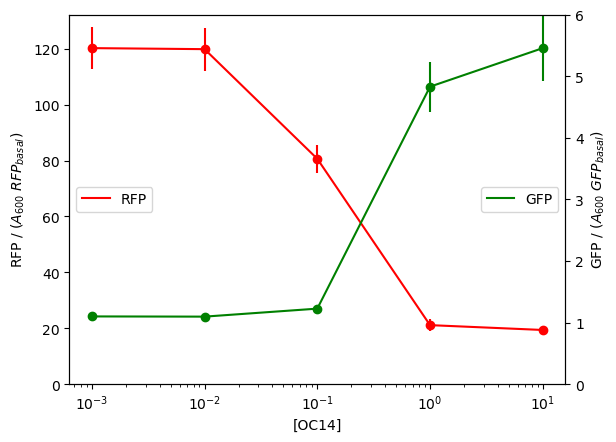

[19.38144662074574, 21.1148862071612, 80.6512419250554, 119.9001793483836, 120.26952911563737] [5.4555320840801516, 4.829766731868398, 1.2256962066379398, 1.0958017541888272, 1.099233769296941] [0.11646754 2.05594104 5.10554887 7.6974541  7.59889038] [0.52599883 0.40810658 0.01980029 0.00104578 0.00122158]


[19.38144662074574,
 21.1148862071612,
 80.6512419250554,
 119.9001793483836,
 120.26952911563737]

In [4]:
doseResponseExp = pkl.load(open('input/subcircuit1_circuit14_doseResponse_maxATC.pkl','rb'))
AHL_list = list(doseResponseExp['AHL_list']); gfpExp_list = list(doseResponseExp['maxATC_doseResponse_gfp']); rfpExp_list = list(doseResponseExp['maxATC_doseResponse_rfp'])
semRed = doseResponseExp['maxATC_doseResponse_rfp_sem']; semGreen = doseResponseExp['maxATC_doseResponse_gfp_sem']


plotDoseResponse2(AHL_list, rfpExp_list, gfpExp_list, semRed, semGreen)
print(rfpExp_list, gfpExp_list, semRed, semGreen)
rfpExp_list

In [5]:
def plotFitvsData(inducer,inducer_continuous, rfpExp_list, gfpExp_list, semRed, semGreen, doseResponseRed,doseResponseGreen,pad=0.01):
    fig,ax = plt.subplots()

    ax.plot(inducer_continuous,doseResponseRed,label='RFP', c='red')
    ax.scatter(inducer,rfpExp_list, c='red')
    # ax.errorbar(inducer,rfpExp_list,yerr=semRed,c='red',fmt='o')
    ax.legend(loc='center left') #upper right
    ax.set_ylabel('RFP / ($A_{600}$ $RFP_{basal})$')
    ax.set_xscale('log')


    ax2=ax.twinx()
    ax2.plot(inducer_continuous,doseResponseGreen,label='GFP', c='green')
    ax2.scatter(inducer,gfpExp_list, c='green')
    # ax2.errorbar(inducer,gfpExp_list,yerr=semGreen,c='green',fmt='o')
    ax2.legend(loc='center right') #upper left
    ax2.set_ylabel('GFP / ($A_{600}$ $GFP_{basal})$')
    ax.set_xscale('log')


    plt.show()


plotFitvsData(OC14_list,OC14_continuous, rfpExp_list, gfpExp_list, semRed, semGreen, rfpFit_continous,gfpFit_continous)


NameError: name 'OC14_continuous' is not defined

In [ ]:
OC14_list = np.logspace(-3,1, 5)
OC14_continuous = np.logspace(-3,1, 100)

print(OC14_continuous[0], OC14_continuous[-1])

0.001 10.0


In [ ]:
OC14_list

[0.001, 0.01, 0.1, 1.0, 10.0]

[ 4.46235652  0.01955934 -2.05149295]


/var/folders/bt/1cqt3cks1sl9cz4dfwlyxhpm0000gn/T/ipykernel_2526/464552914.py:12: RuntimeWarning: invalid value encountered in power
  F = 1 + Vf*(1/(1+((muv*Kvb)/(kv*OC14 + 1e-8))**nvd ))


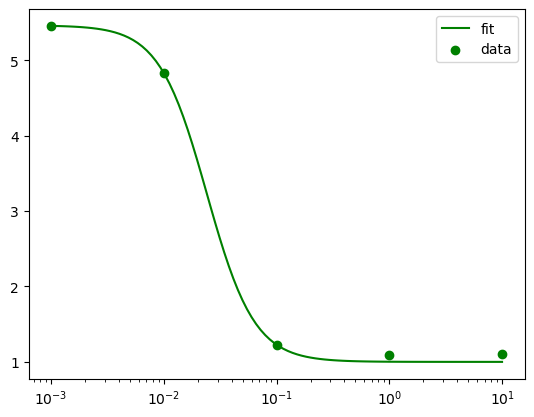

/var/folders/bt/1cqt3cks1sl9cz4dfwlyxhpm0000gn/T/ipykernel_2526/464552914.py:20: RuntimeWarning: invalid value encountered in power
  E = 1 + Ve*(1/(1+(F/(Kfe+1e-8))**nfe))


[1.93474839e+07 5.69262707e-05 1.23053587e+00]


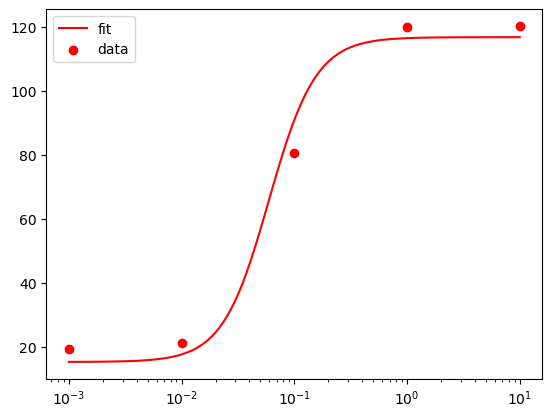

[ 4.46235652e+00  1.95593408e-02 -2.05149295e+00  1.93474839e+07
  5.69262707e-05  1.23053587e+00]


array([ 4.46235652,  0.01955934, -2.05149295])

In [16]:
from scipy.optimize import curve_fit

OC14_list = np.logspace(-3,1, 5)
OC14_continuous = np.logspace(-3,1, 100)

# def gfp_steadystate(OC14, Kvb, Vf, nvd): 
def gfp_steadystate(OC14,  Vf,Kvb, nvd): 
# def gfp_steadystate(OC14,  Vf): 
    # Kvb=4.50510644e-01
    muv = 0.0225 ; kv =  0.0183 ;
    # nvd=2; nfe=2
    F = 1 + Vf*(1/(1+((muv*Kvb)/(kv*OC14 + 1e-8))**nvd ))
    return F


def rfp_steadystate(F,Ve,Kfe, nfe): 
    
    muv = 0.0225 ; kv =  0.0183 ;
    # nvd=2; nfe=2
    E = 1 + Ve*(1/(1+(F/(Kfe+1e-8))**nfe))
    return E


def steadystate(OC14,Vf, Kvb,Ve,Kfe ):
# def steadystate(OC14, Vf,Ve,Kfe ):
    # Kvb=4.50510644e-01
    muv = 0.0225 ; kv =  0.0183 ; nvd=2; nfe=2
    F = 1 + Vf*(1/(1+((muv*Kvb)/(kv*OC14 + 1e-8))**nvd ))
    E = 1 + Ve*(1/(1+(F/(Kfe+1e-8))**nfe))
    return E,F


# def steadystate(OC14, Vf,  Kvb, nvd,Ve,Kfe, nfe ):
#     muv = 0.0225 ; kv =  0.0183 
#     F = 1 + Vf*(1/(1+((muv*Kvb)/(kv*OC14 + 1e-8))**nvd ))
#     E = 1 + Ve*(1/(1+(F/(Kfe+1e-8))**nfe))
#     return E,F
def steadystate(OC14, Vf,  Kvb, nvd,Ve,Kfe, nfe ):
    muv = 0.0225 ; kv =  0.0183 
    F = 1 + Vf*(1/(1+((muv*Kvb)/(kv*OC14 + 1e-8))**nvd ))
    E = 1 + Ve*(1/(1+(F/(Kfe+1e-8))**nfe))
    return E,F

def loss(data,model):
    mean_data = np.mean(data)
    # relError = np.sum(np.square(data - model))/np.sum(np.square(data - mean_data))
    relError = np.sum(np.square(data - model))
    return relError

# data = np.array([rfpExp_list, gfpExp_list])
# p0=[1, 5, 0.1,4,1, 120, 0.1,4]
# model = steadystate(OC14_list, *p0)
# print([loss(data[x],model[x]) for x in range(2)])


parametersgreen, covariancegfp = curve_fit(gfp_steadystate, OC14_list, gfpExp_list, p0=[ 1,5,2], maxfev=1000000000)
# parametersgreen, covariancegfp = curve_fit(gfp_steadystate, OC14_list, gfpExp_list, p0=[ 1,5], maxfev=1000000000)
print(parametersgreen)
gfpFit_continous = gfp_steadystate(OC14_continuous, *parametersgreen)
gfpFit = gfp_steadystate(OC14_list, *parametersgreen)
plt.plot(OC14_continuous,gfpFit_continous , label='fit', c='green')
plt.scatter(OC14_list,gfpExp_list , label='data', c='green')
plt.xscale('log')
plt.legend()
plt.show()

# print(f'mu = {parameters[0]}, V = {parameters[1]}, km = {parameters[2]}, n = {parameters[3]}')

# parametersred, covariancerfp = curve_fit(rfp_steadystate, gfpFit, rfpExp_list, p0=[120, 5], maxfev=1000000000)
parametersred, covariancerfp = curve_fit(rfp_steadystate, gfpFit, rfpExp_list, p0=[120, 5,2], maxfev=1000000000)
print(parametersred)
rfpFit = rfp_steadystate(gfpFit, *parametersred)
rfpFit_continous = rfp_steadystate(gfpFit_continous, *parametersred)
plt.plot(OC14_continuous,rfpFit_continous , label='fit', c='red')
plt.scatter(OC14_list,rfpExp_list , label='data', c='red')
plt.xscale('log')
plt.legend()
plt.show()
# print(f'mu = {parameters[0]}, V = {parameters[1]}, km = {parameters[2]}, n = {parameters[3]}')
data = np.array([gfpExp_list,rfpExp_list])
model = np.array([gfpFit,rfpFit])
pfit = np.concatenate((parametersgreen, parametersred))

print(pfit)
np.sum([loss(data[x],model[x]) for x in range(2)])
parametersgreen

In [ ]:
covariancegfp

array([[ 7.06363193e+00,  2.64159065e-03, -1.20458641e-02],
       [ 2.64159065e-03,  1.14949733e-05,  5.32354381e-05],
       [-1.20458641e-02,  5.32354381e-05,  5.07017053e-04]])

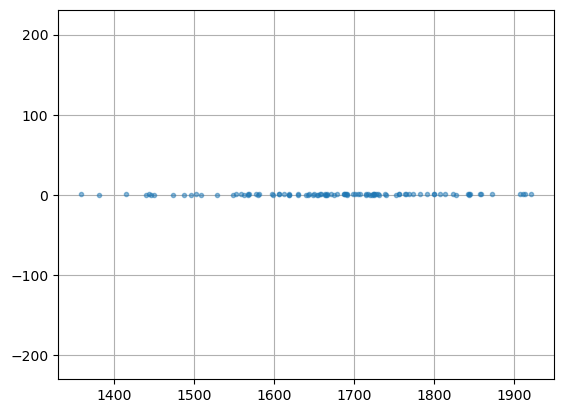

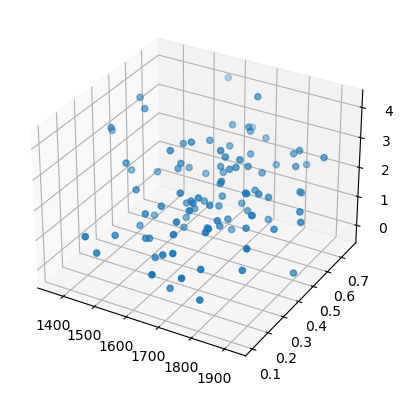

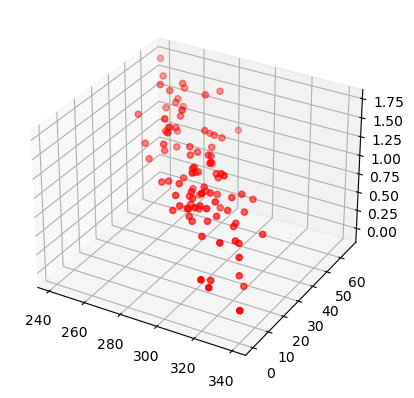

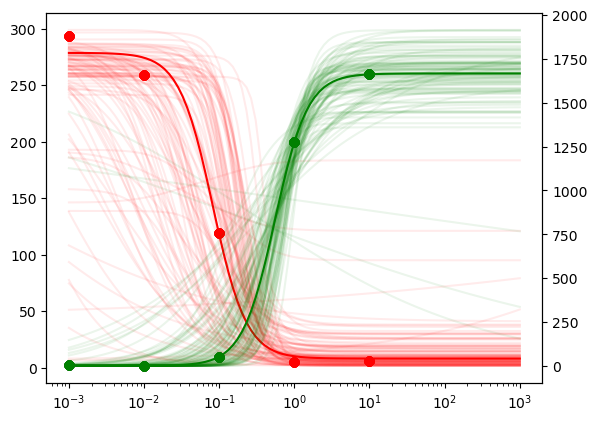

In [ ]:
sampled_parametersgreen = np.random.multivariate_normal(parametersgreen, 2000*covariancegfp, size=100, check_valid='warn')#
sampled_parametersred = np.random.multivariate_normal(parametersred, 1*covariancerfp, size=100, check_valid='warn')#

sampled_params = np.concatenate((sampled_parametersgreen,sampled_parametersred),axis=1)
def steadystate(OC14, Vf,  Kvb, nvd,Ve,Kfe, nfe ):
    muv = 0.0225 ; kv =  0.0183 
    F = 1 + Vf*(1/(1+((muv*Kvb)/(kv*OC14 + 1e-8))**nvd ))
    E = 1 + Ve*(1/(1+(F/(Kfe+1e-8))**nfe))
    return E,F

import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d    
plt.plot(sampled_parametersgreen[:, 0], sampled_parametersgreen[:, 1], '.', alpha=0.5)
plt.axis('equal')
plt.grid()
plt.show()

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(sampled_parametersgreen[:, 0], sampled_parametersgreen[:, 1], sampled_parametersgreen[:, 2])
plt.show()
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(sampled_parametersred[:, 0], sampled_parametersred[:, 1], sampled_parametersred[:, 2], c='r')
plt.show()


fig,ax = plt.subplots()
ax2=ax.twinx()
OC14_continuous = np.logspace(-3,3,100)
for p in sampled_params:
    steadystate(OC14_continuous, *p)
    ax.plot(OC14_continuous, steadystate(OC14_continuous, *p)[0], c='red', alpha=0.08)
    ax2.plot(OC14_continuous, steadystate(OC14_continuous, *p)[1], c='green', alpha=0.08)
    ax.scatter(OC14_list,rfpExp_list , label='data', c='red')
    ax2.scatter(OC14_list,gfpExp_list , label='data', c='green')
    plt.xscale('log')
ax.plot(OC14_continuous, steadystate(OC14_continuous, *pfit)[0], c='red')
ax2.plot(OC14_continuous, steadystate(OC14_continuous, *pfit)[1], c='green')

# def plotDoseResponsevsData(inducer, rfpExp_list, gfpExp_list, semRed, semGreen,pad=0.01, inducerName='OC14'):
#     fig,ax = plt.subplots()

#     ax.plot(inducer,rfpExp_list,label='RFP', c='red')
#     ax.scatter(inducer,rfpExp_list, c='red')
#     ax.errorbar(inducer,rfpExp_list,yerr=semRed,c='red',fmt='o')
#     ax.legend(loc='center left') #upper right
#     ax.set_ylabel('RFP / ($A_{600}$ $RFP_{basal})$')
#     ax.set_xscale('log')


#     ax2=ax.twinx()
#     ax2.plot(inducer,gfpExp_list,label='GFP', c='green')
#     ax2.scatter(inducer,gfpExp_list, c='green')
#     ax2.errorbar(inducer,gfpExp_list,yerr=semGreen,c='green',fmt='o')
#     ax2.legend(loc='center right') #upper left
#     ax2.set_ylabel('GFP / ($A_{600}$ $GFP_{basal})$')
#     ax.set_xscale('log')

#     ax.set_xlabel(f'{inducerName} concentration (µM)')

#     plt.show()


Step 2: Hesian


In [ ]:
def fullLoss(data, OC14_list, p):
    model = steadystate(AHL_list, *p)
    return [loss(data[x],model[x]) for x in range(2)]
data = np.array([rfpExp_list, gfpExp_list])
OC14_list = np.logspace(1,-3, 5)
p0=[1, 5, 0.1,4,1, 120, 0.1,4]
print(fullLoss(data, OC14_list, p0))
print(fullLoss(data, OC14_list, pfit))

TypeError: can't multiply sequence by non-int of type 'float'

In [ ]:
print(pfit)

[ 1.66489174e+03 -4.50510644e-01  2.75335512e+02  4.65832486e+01]


In [17]:
import jax

from jax.config import config
config.update("jax_debug_nans", True)

def steadystate(OC14,Kvb, Vf, Ve,Kfe ):
# def steadystate(OC14, Vf, Ve,Kfe ):
    # Kvb = -4.5510644e-01
    muv = 0.0225 ; kv =  0.0183 ; nvd=2; nfe=2
    F = 1 + Vf*(1/(1+((muv*Kvb)/(kv*OC14 + 1e-8))**nvd ))
    E = 1 + Ve*(1/(1+(F/(Kfe+1e-8))**nfe))
    return E,F

parametersgreen
def loss(data,model):
    mean_data = np.mean(data)
    # relError = (jax.numpy.square(data - model))/(jax.numpy.sum(jax.numpy.square(data - mean_data))+1e-8)
    # relError = np.sum(np.square(data - model))/np.sum(np.square(data - mean_data))
    relError = jax.numpy.sum(jax.numpy.square(data - model))
    # relError = jax.numpy.square(data - model)
    # relError = data - model
    return relError
# steadystate = lambda x: [1 + x[0]*(1/(1+((x[1]*x[2])/(x[3]*AHL_list + 1e-8))**x[4] )), 1 + x[5]*(1/(1+((1 + x[0]*(1/(1+((x[1]*x[2])/(x[3]*AHL_list + 1e-8))**x[4] )))/(x[6]+1e-8))**x[7]))]
loss_i_l = []
def func(p):
    loss_i = 0
    data = np.array([rfpExp_list, gfpExp_list])


    for count,OC14 in enumerate(OC14_list):
      model = steadystate(OC14,*p)
    #   loss_i+=(loss(data[0][count],model[0]) + loss(data[1][count],model[1]))
      # loss_i+=np.sum(loss(data[x][count],model[x]) for x in range(2))
      loss_i+= (rfpExp_list[count] - model[0])**2 + (gfpExp_list[count] - model[1])**2
      # loss_i+= (gfpExp_list[count] - model)**2
    
    return loss_i


# p1,p2,p3,p4= pfit
p1,p2,p3= pfit
# hesian = jax.hessian(func)(jax.numpy.array([p1, p2, p3, p4]))
hesian = jax.hessian(func)(jax.numpy.array(*pfit))
hesian

ValueError: too many values to unpack (expected 3)

In [13]:
pfit

array([ 4.46235652e+00,  1.95593408e-02, -2.05149295e+00,  1.93474839e+07,
        5.69262707e-05,  1.23053587e+00])

In [ ]:
func(pfit_hesian[0])
func(pfit)

640.4015291183345

In [ ]:
print(steadystate(OC14_list, *pfit_hesian[0]))


NameError: name 'pfit_hesian' is not defined

In [ ]:
import scipy
scipy.linalg.eigvals(hesian)

array([4.2776465e+06+0.j, 1.4804348e+01+0.j, 1.9384235e+00+0.j,
       3.8635540e+00+0.j], dtype=complex64)

In [ ]:
data = np.array([rfpExp_list, gfpExp_list])
model1 = steadystate(OC14_list, *pfit)
print(pfit)
print(loss(data, model1))
model2 = steadystate(OC14_list,*pfit_hesian[0])
print(pfit_hesian[0])
print(loss(data, model2))

arr  = np.array([1.66489174e+03, -4.5510644e-01,  2.75335512e+02 ,  4.65832486e+01])
model3 = steadystate(OC14_list,*arr)
print(arr)
print(loss(data, model3))

[ 1.66489174e+03 -4.50510644e-01  2.75335512e+02  4.65832486e+01]
640.40155
[1665.93370555  369.50237081  273.57114495   48.19101371]
4547257.0
[ 1.66489174e+03 -4.55106440e-01  2.75335512e+02  4.65832486e+01]
685.60767


In [ ]:
print(data)
print(model1)
print(model2)


[[2.93397195e+02 2.58820659e+02 1.19608023e+02 5.07705412e+00
  5.85583834e+00]
 [4.60460655e+00 1.00000000e+00 5.38217160e+01 1.27496460e+03
  1.66082578e+03]]
(array([285.61560234, 285.33771855,  94.39877995,   1.24494551,
         1.14441616]), array([1.00543233e+00, 1.54252399e+00, 5.35518930e+01, 1.27501004e+03,
       1.66079927e+03]))
(array([285.17290756, 285.17290252, 285.17239861, 285.11889704,
       253.0951192 ]), array([ 1.00000012,  1.00001242,  1.00124151,  1.12414086, 13.32313729]))


In [ ]:
hesian = np.array(hesian)
hesian[1,1] = 3.1609027e+00
hesian

array([[   3.1609027, 2091.439    ],
       [2091.439    ,    3.1609027]], dtype=float32)

In [ ]:
from scipy.stats import multivariate_normal
# pfit_hesian = scipy.stats.multivariate_normal(pfit, hesian)
# OC14_continuous = np.logspace(-3,1, 100)
# pfit_hesian = np.random.multivariate_normal(pfit, hesian, size=100, check_valid='warn')#
# pfit = np.array([4.1694060e+06, 2.1789984e+01, 1.9816087e+00, 4.0619812e+00])
var = multivariate_normal(mean=pfit, cov=hesian)
pfit_hesian = var.rvs(size=100)
print(pfit_hesian)

[[1665.57925541  278.22654419   49.89321447]
 [1661.89012703  275.65708916   49.13362212]
 [1665.32216423  277.69927899   52.42064411]
 [1664.26294553  276.49615167   49.79750285]
 [1664.85720846  274.87917946   40.93497919]
 [1664.73592342  276.12527805   37.97967997]
 [1665.05523653  273.75213815   46.55483071]
 [1667.63227917  275.51202328   43.57764117]
 [1664.25361311  275.02049892   47.98290752]
 [1664.85560214  274.76490137   43.59382829]
 [1666.78201349  277.35228809   46.61697467]
 [1665.48987907  277.22190996   53.48679299]
 [1664.49134727  273.81440692   52.34946153]
 [1665.54010037  275.1736834    36.3872927 ]
 [1668.64986224  275.95602089   46.46838655]
 [1665.14900163  276.50912619   45.61743975]
 [1662.54841008  278.12871502   45.4144321 ]
 [1665.95648058  274.03432918   45.29498325]
 [1661.111457    276.30342303   47.12794955]
 [1665.34132092  275.71551232   45.37455584]
 [1667.07318011  277.08480176   48.59062549]
 [1663.87727659  275.93364026   46.10013106]
 [1663.606

/Users/mo2016/opt/anaconda3/envs/condaenv/lib/python3.8/site-packages/scipy/stats/_multivariate.py:653: RuntimeWarning: covariance is not positive-semidefinite.
  out = random_state.multivariate_normal(mean, cov, size)


In [ ]:
hesian

DeviceArray([[3.1609027e+00, 2.0914390e+03],
             [2.0914390e+03, 3.6288490e+06]], dtype=float32)

[1663.46392595  279.09735683   45.87829427]
[1665.36128614  275.3380448    49.52103914]
[1665.84778311  277.63739946   48.13460369]
[1665.88926084  276.93121628   47.29244205]
[1662.40180368  277.22261799   47.9500878 ]
[1666.7317289   274.49057096   39.84261816]
[1661.87228612  276.35234363   42.69156033]
[1665.23521491  274.7508074    45.97216362]
[1664.44909606  274.62725427   47.14880241]
[1666.30495063  277.38982698   56.83237271]
[1669.03279934  280.52123883   44.1407573 ]
[1666.50295927  274.5531226    43.27395923]
[1665.54211402  275.51381736   47.79352366]
[1668.94117877  274.15900355   39.89990574]
[1664.68316283  275.39111531   56.42269442]
[1666.44628164  277.86829521   42.38712295]
[1661.91169151  277.82728004   45.35916825]
[1664.5709401   277.60005537   43.81680438]
[1664.46784957  276.8153302    44.58375116]
[1664.85292414  277.12128369   47.31051882]
[1663.2773826   276.22973202   45.04293863]
[1669.05848062  277.62292954   44.58256865]
[1667.71631707  277.63961661   4

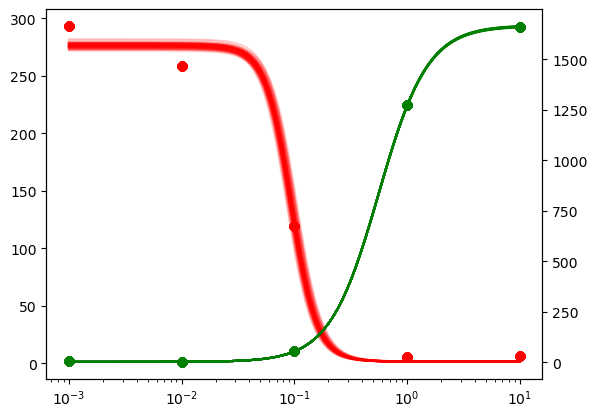

In [ ]:
from scipy.stats import multivariate_normal
# pfit_hesian = scipy.stats.multivariate_normal(pfit, hesian)
OC14_continuous = np.logspace(-3,1, 100)
# pfit_hesian = np.random.multivariate_normal(pfit, hesian, size=100, check_valid='warn')#
from scipy.stats import multivariate_normal
# pfit = np.array([4.1694060e+06, 2.1789984e+01, 1.9816087e+00, 4.0619812e+00])
var = multivariate_normal(mean=pfit, cov=hesian)
pfit_hesian = var.rvs(size=100)

# var.pdf([1,0])
#100 sample multinormal distribution with mean pfit and covariance hesian
fig,ax = plt.subplots()
ax2=ax.twinx()
for p in pfit_hesian:
    print(p)
    steadystate(OC14_continuous, *p)
    # ax.plot(OC14_continuous, steadystate(OC14_continuous, *p)[0], c='red', alpha=0.1)
    ax.plot(OC14_continuous, steadystate(OC14_continuous, *p)[0], c='red', alpha=0.1)
    ax2.plot(OC14_continuous, steadystate(OC14_continuous, *p)[1], c='green', alpha=0.1)
    ax.scatter(OC14_list,rfpExp_list , label='data', c='red')
    ax2.scatter(OC14_list,gfpExp_list , label='data', c='green')
    plt.xscale('log')
pfit_hesian

print(pfit)

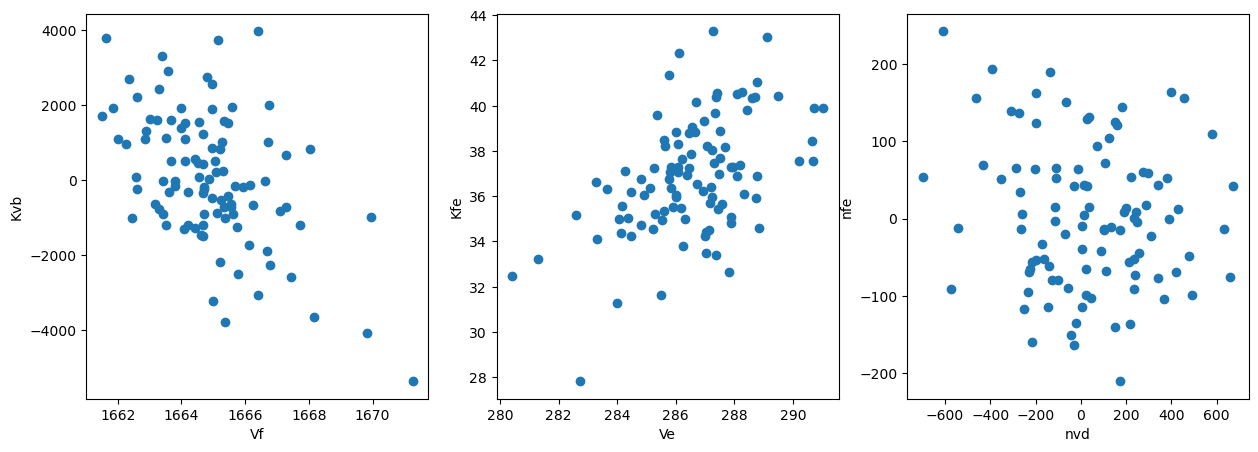

In [ ]:

# def steadystate(OC14,Vf,  Kvb, nvd,Ve,Kfe, nfe ):


#plot p1 vs p2
p1 = pfit_hesian[:,0]
p2 = pfit_hesian[:,1]
p3 = pfit_hesian[:,2]
p4 = pfit_hesian[:,3]
p5 = pfit_hesian[:,4]
p6 = pfit_hesian[:,5]

#subplot of three params comparisons
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
ax1.scatter(p1,p2)
ax1.set_xlabel('Vf')
ax1.set_ylabel('Kvb')
ax2.scatter(p4,p5)
ax2.set_xlabel('Ve')
ax2.set_ylabel('Kfe')
ax3.scatter(p3,p6)
ax3.set_xlabel('nvd')
ax3.set_ylabel('nfe')
plt.show()





TypeError: Input z must be 2D, not 0D

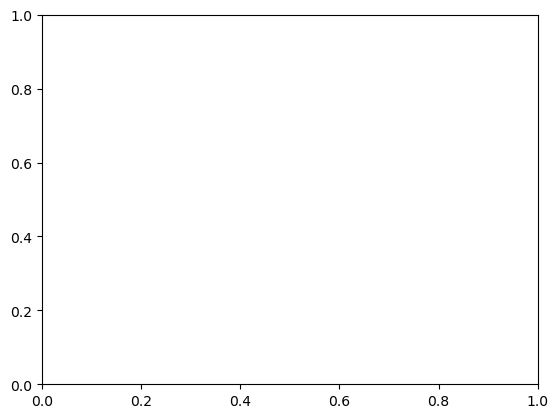

In [ ]:

# x, y = np.mgrid[pfit[0]*0.9:pfit[0]*1.1:1, pfit[0]*0.9:pfit[0]*1.1:1]
# pos = np.dstack((x, y))
# rv = multivariate_normal(pfit[:2], hesian[:2,:2])
# fig2 = plt.figure()
# ax2 = fig2.add_subplot(111)
# ax2.contourf(x, y, rv.pdf(pos))
# plt.show()

x, y = np.mgrid[pfit[5]*0.9:pfit[5]*1.1:1, pfit[5]*0.9:pfit[5]*1.1:1]
pos = np.dstack((x, y))
rv = multivariate_normal(pfit[2:4], hesian[2:4,2:4])
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.contourf(x, y, rv.pdf(pos))
plt.show()

[1664.92644317  -41.63658881    2.10479621  286.30491567   36.4823414
    2.86757302]
[ 1.66489501e+03  7.06775617e+01 -1.38297583e+01  2.86277042e+02
  3.65188282e+01 -2.49779554e-01]
[ 1.66497109e+03 -7.61167592e+01  1.56515069e+00  2.86414782e+02
  3.65565279e+01  4.90902327e+00]
[1664.94764009  -64.8923324     3.42322744  286.25007923   36.4829929
   -1.83598972]
[ 1.66491248e+03  8.27477768e+00 -3.34724369e+00  2.86261882e+02
  3.65024339e+01  3.06344297e-01]
[ 1.66489703e+03  6.59121835e+01  1.07546121e+00  2.86310248e+02
  3.65859561e+01 -4.79078485e-01]
[1664.91991485  102.29692327    4.43198807  286.38622144   36.64267591
    3.18752554]
[1664.936078     46.91302713   -7.55414648  286.40141743   36.558685
    7.94507645]
[1.66503570e+03 3.78964344e+01 4.98456911e+00 2.86341098e+02
 3.66037448e+01 7.97633477e-01]
[ 1.66501349e+03 -4.93506468e+01  1.29946060e+01  2.86317464e+02
  3.65895691e+01 -1.58830452e+00]


/var/folders/bt/1cqt3cks1sl9cz4dfwlyxhpm0000gn/T/ipykernel_43597/2210539980.py:9: RuntimeWarning: invalid value encountered in power
  F = 1 + Vf*(1/(1+((muv*Kvb)/(kv*OC14 + 1e-8))**nvd ))


[1664.93329773   -6.80272533    8.00018867  286.33490608   36.71734937
   -3.79681167]
[ 1.66498735e+03 -1.96282600e+01  1.49687146e+01  2.86285848e+02
  3.65943371e+01  1.03187722e-01]
[1664.91529241   -8.42906665    8.50742672  286.27620672   36.5898971
    3.0159492 ]
[1665.01695308  -42.79943339    7.06336511  286.36110297   36.68875628
   -3.25572435]
[ 1.66500332e+03 -3.17266562e+01  1.84342221e+01  2.86360556e+02
  3.67153667e+01 -6.99455501e-01]
[ 1.66488318e+03  8.86456214e+01 -2.23928746e+01  2.86192579e+02
  3.64264602e+01 -3.36571771e-01]
[ 1.66498373e+03 -3.56197102e+01  1.92968120e+01  2.86378175e+02
  3.66713418e+01  2.97080920e-01]
[ 1.66495221e+03  1.00866848e+01 -5.66018121e+00  2.86283860e+02
  3.65722175e+01 -1.32374040e+00]
[1664.9079668   106.72127541   -2.85886804  286.39275586   36.57967082
    5.71814837]
[1664.94612012   66.52176278  -12.37942915  286.32488161   36.44346471
    4.43046467]
[1664.97561464   19.97400964  -18.86366564  286.24956761   36.37187334


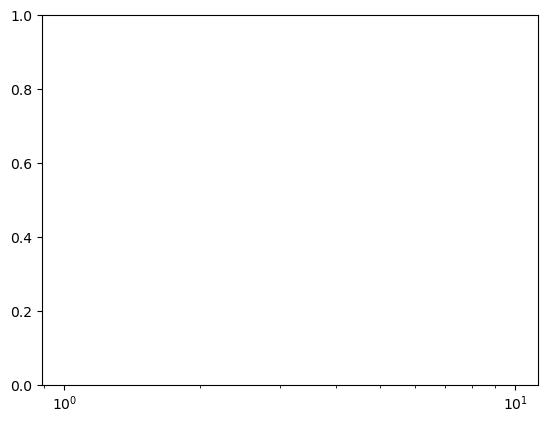

In [ ]:
pfit_hesian = multivariate_normal.rvs(mean=pfit, cov=hesian, size=100, random_state=None)
for p in pfit_hesian:
    print(p)
    steadystate(OC14_continuous, *p)
    ax.plot(OC14_continuous, steadystate(OC14_continuous, *p)[0], c='red', alpha=0.1)
    ax2.plot(OC14_continuous, steadystate(OC14_continuous, *p)[1], c='green', alpha=0.1)
    ax.scatter(OC14_list,rfpExp_list , label='data', c='red')
    ax2.scatter(OC14_list,gfpExp_list , label='data', c='green')
    plt.xscale('log')